# Correlation
* measures association (NOT x causes y, ie. causation)
correlation is a statistical measure to which 2 variables move in relation with each other

### Formula
* r = 	Σ(X-Xa)(Y-Ya)/sqrt(	Σ(X-Xa)^2 * Σ(Y-Ya)^2 )
* r = correlation factor
* Xa = avg observations of X
* Ya = avg observations of Y

* r ranges between -1 and 1 (inclusive)
* r = 1:  perfect positive correlation
* r = -1:  perfect negative correlation
* r = 0:  no correlation

In [27]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
tickers = ['AAPL', 'TWTR', 'IBM', 'BTC-USD']
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers,start)
data = data['Adj Close']
data = data.dropna()      #Removes weekend NaaN due to BTC being open 24-hours

In [16]:
data.head()

Symbols,AAPL,TWTR,IBM,BTC-USD
Date,,,,
2020-01-02,73.683571,32.299999,112.916946,6985.470215
2020-01-03,72.967209,31.520000,112.016418,7344.884277
2020-01-06,73.548630,31.639999,111.816292,7769.219238
2020-01-07,73.202744,32.540001,111.891327,8163.692383
2020-01-08,74.380287,33.049999,112.825203,8079.862793


In [17]:
log_returns = np.log(data/data.shift())   #normalize with Log Returns

In [18]:
log_returns.corr()      #Compute pairwise correlation of columns,

Symbols,AAPL,TWTR,IBM,BTC-USD
Symbols,,,,
AAPL,1.000000,0.462823,0.443439,0.337824
TWTR,0.462823,1.000000,0.268003,0.275251
IBM,0.443439,0.268003,1.000000,0.212037
BTC-USD,0.337824,0.275251,0.212037,1.000000


In [21]:
sp500 = pdr.get_data_yahoo("^GSPC",start)
log_returns['SP500'] = np.log(sp500['Adj Close']/sp500['Adj Close'].shift())

In [22]:
log_returns.head()

Symbols,AAPL,TWTR,IBM,BTC-USD,SP500
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.024445,-0.008007,0.050172,-0.007085
2020-01-06,0.007937,0.003800,-0.001788,0.056166,0.003527
2020-01-07,-0.004714,0.028048,0.000671,0.049527,-0.002807
2020-01-08,0.015958,0.015551,0.008312,-0.010322,0.004890


In [23]:
log_returns.corr()

Symbols,AAPL,TWTR,IBM,BTC-USD,SP500
Symbols,,,,,
AAPL,1.000000,0.462823,0.443439,0.337824,0.821161
TWTR,0.462823,1.000000,0.268003,0.275251,0.526560
IBM,0.443439,0.268003,1.000000,0.212037,0.674290
BTC-USD,0.337824,0.275251,0.212037,1.000000,0.407339
SP500,0.821161,0.526560,0.674290,0.407339,1.000000


In [24]:
def test_correlation(ticker):
    df = pdr.get_data_yahoo(ticker,start)
    lr = log_returns.copy()
    lr[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift())
    return lr.corr()

In [26]:
test_correlation('TLT')

Symbols,AAPL,TWTR,IBM,BTC-USD,SP500,TLT
Symbols,,,,,,
AAPL,1.000000,0.462823,0.443439,0.337824,0.821161,-0.202419
TWTR,0.462823,1.000000,0.268003,0.275251,0.526560,-0.106675
IBM,0.443439,0.268003,1.000000,0.212037,0.674290,-0.311925
BTC-USD,0.337824,0.275251,0.212037,1.000000,0.407339,-0.046144
SP500,0.821161,0.526560,0.674290,0.407339,1.000000,-0.301194
TLT,-0.202419,-0.106675,-0.311925,-0.046144,-0.301194,1.000000


In [28]:
def visualze_correlation(ticker1, ticker2):
    df = pdr.get_data_yahoo([ticker1, ticker2], start)
    df = df['Adj Close']
    df = df/df.iloc[0]
    fig, ax = plt.subplots()
    df.plot(ax=ax)

<IPython.core.display.Javascript object>


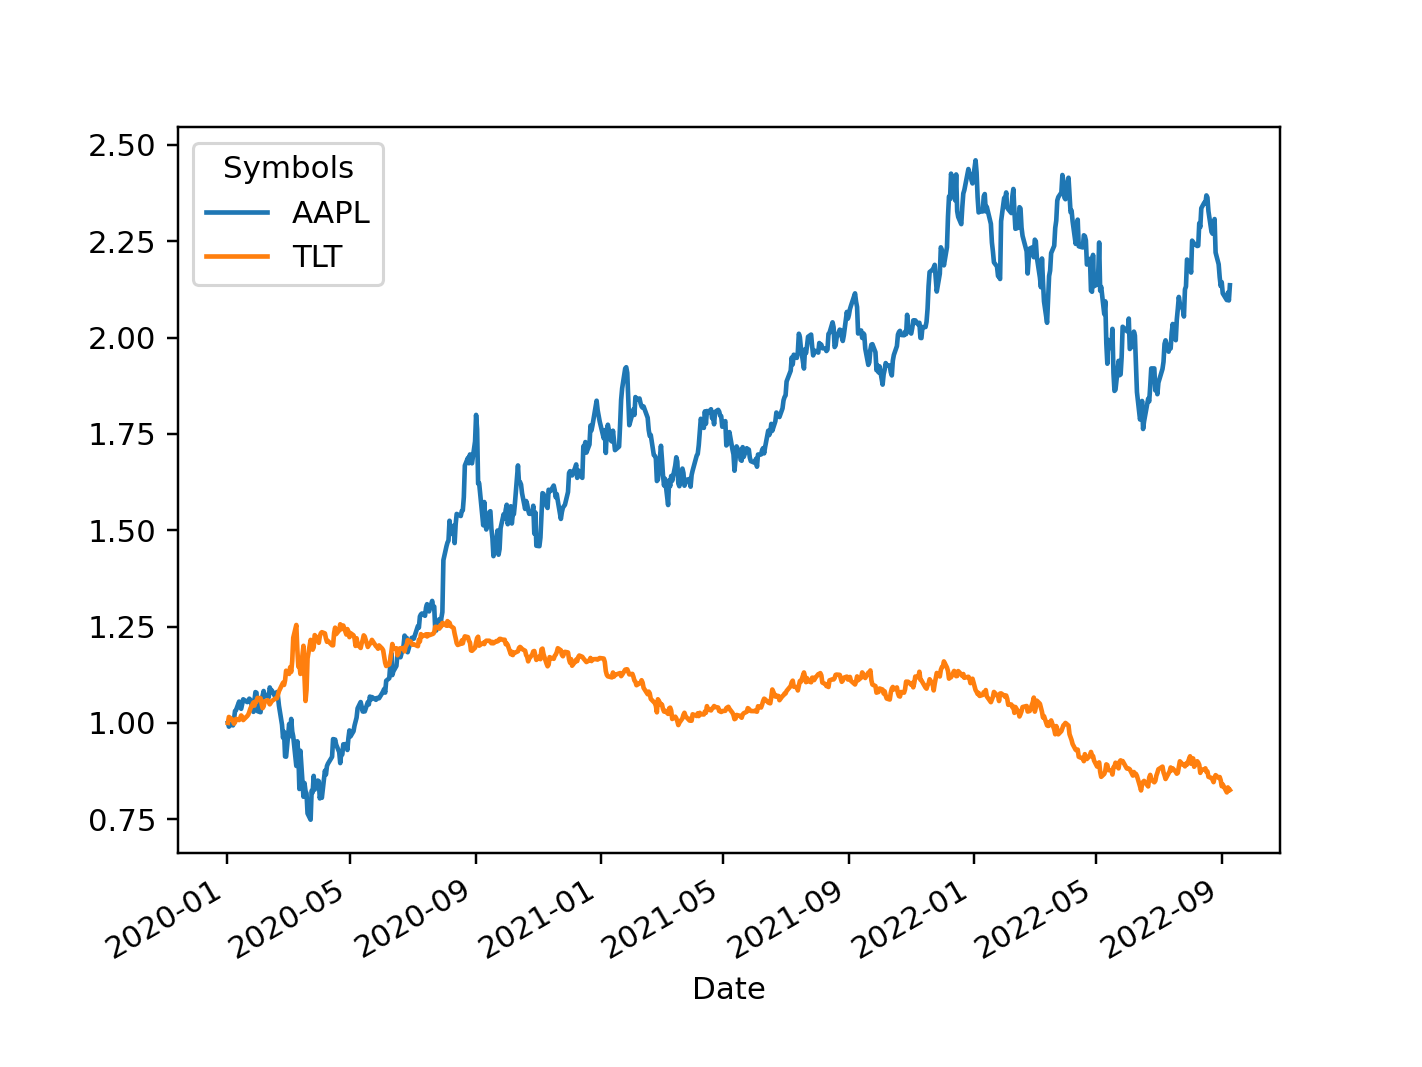

In [29]:
visualze_correlation("AAPL","TLT")

<IPython.core.display.Javascript object>


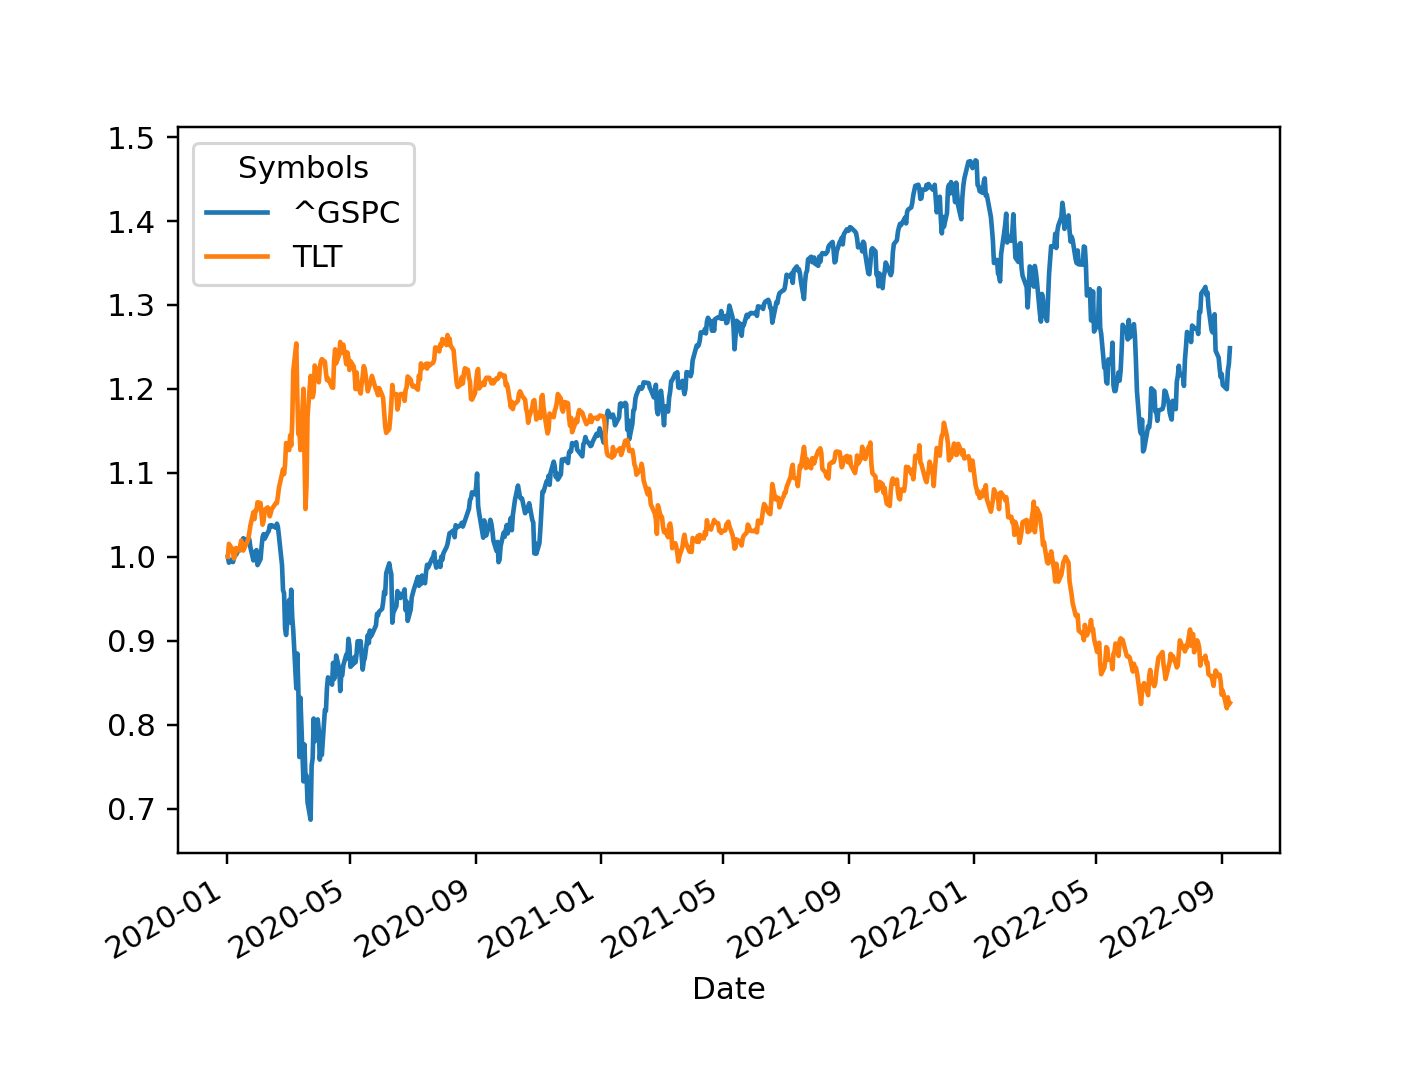

In [30]:
visualze_correlation("^GSPC", "TLT")

## Linear Regression
* quantify the direction and strength of the relationship
* linear regression produces an equation

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


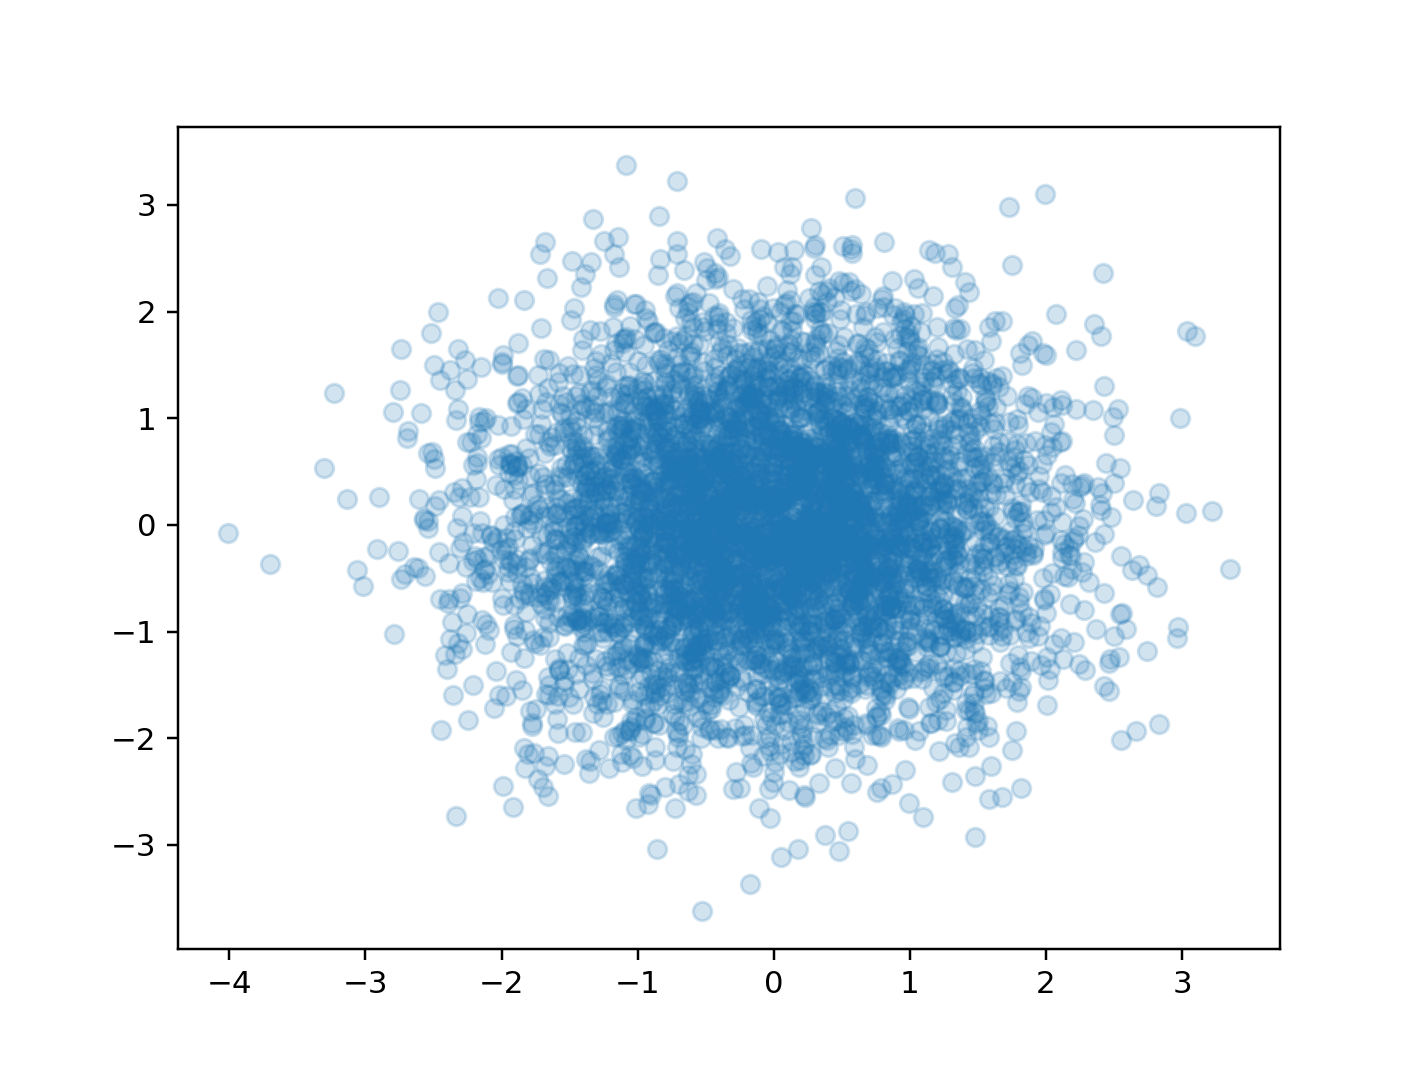

In [35]:
X = np.random.randn(5000)    # Generate random points to show non-correlated plot
Y = np.random.randn(5000)
fig, ax = plt.subplots()
ax.scatter(X,Y,alpha=.2)

In [37]:
tickers = ['AAPL', 'TWTR', 'IBM', 'MSFT', '^GSPC']
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers,start)

In [38]:
data = data['Adj Close']

In [39]:
data.head()

Symbols,AAPL,TWTR,IBM,MSFT,^GSPC
Date,,,,,
2020-01-02,73.683571,32.299999,112.916931,156.592026,3257.850098
2020-01-03,72.967216,31.520000,112.016396,154.642166,3234.850098
2020-01-06,73.548622,31.639999,111.816269,155.041885,3246.280029
2020-01-07,73.202736,32.540001,111.891327,153.628250,3237.179932
2020-01-08,74.380287,33.049999,112.825203,156.075287,3253.050049


In [40]:
log_returns = np.log( data/data.shift())

In [42]:
log_returns

Symbols,AAPL,TWTR,IBM,MSFT,^GSPC
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.024445,-0.008007,-0.012530,-0.007085
2020-01-06,0.007936,0.003800,-0.001788,0.002581,0.003527
2020-01-07,-0.004714,0.028048,0.000671,-0.009160,-0.002807
2020-01-08,0.015958,0.015551,0.008312,0.015803,0.004890
...,...,...,...,...,...
2022-09-06,-0.008249,0.000518,-0.008408,-0.011035,-0.004103
2022-09-07,0.009211,0.063891,0.007782,0.018931,0.018175
2022-09-08,-0.009664,0.015653,0.005933,0.001665,0.006589


In [54]:
ticker_a = 'AAPL'
ticker_b = '^GSPC'

def linear_regression(ticker_a, ticker_b):

    # Convert from pandas to numpy for LinearRegression function
    # Also must skip first dataset due to it being NaaN
    # reshape it so it is one long array
    X = log_returns[ticker_a].iloc[1:].to_numpy().reshape(-1,1)
    Y = log_returns[ticker_b].iloc[1:].to_numpy().reshape(-1,1)

    lin_regr = LinearRegression()
    lin_regr.fit(X,Y)

    Y_pred = lin_regr.predict(X)

    alpha = lin_regr.intercept_[0]
    beta = lin_regr.coef_[0,0]

    fig,ax = plt.subplots()
    ax.set_title("LinReg of " + ticker_a + " and " + ticker_b + ", Alpha: " + str(round(alpha,5)) + ", Beta: " + str(round(beta,3)))
    ax.scatter(X,Y)
    ax.plot(X,Y_pred,c='r')

<IPython.core.display.Javascript object>


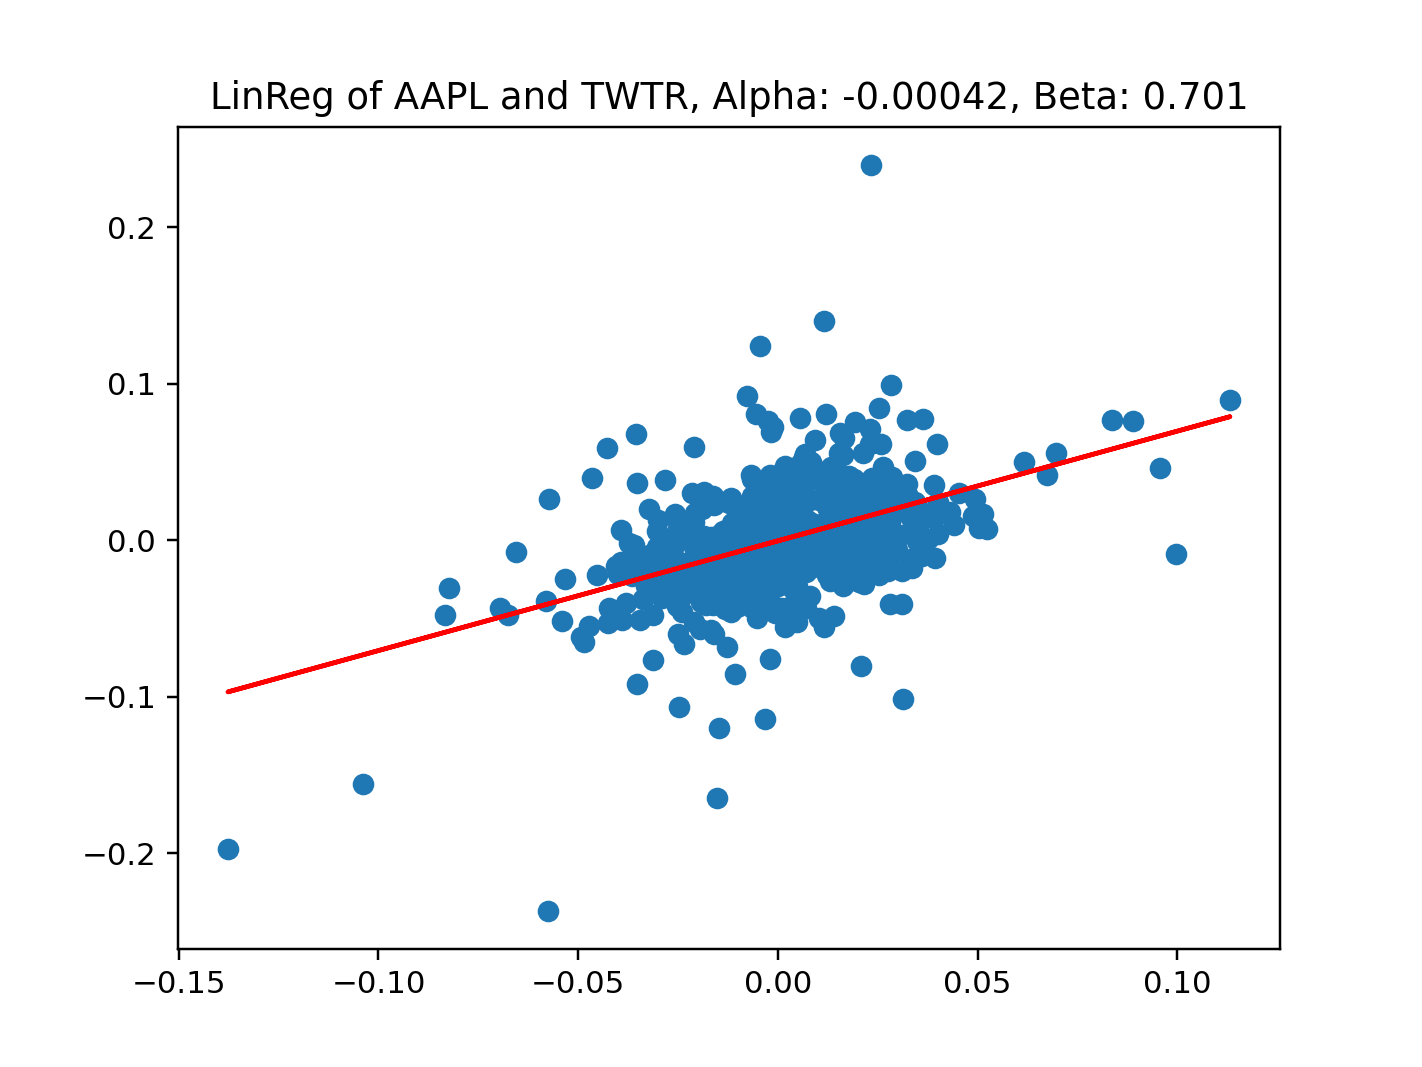

In [58]:
linear_regression('AAPL', 'TWTR')